In [1]:
import keras
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

Using TensorFlow backend.


In [7]:
import pickle

with open('BorderlineSMOTE_rgb.pickle', 'rb') as f:
    data = pickle.load(f, encoding='latin1')


data['y_train'] = to_categorical(data['y_train'], num_classes=43)
data['y_validation'] = to_categorical(data['y_validation'], num_classes=43)
data['y_test'] = to_categorical(data['y_test'], num_classes=43)

# Making channels come at the end
data['x_train'] = data['x_train'].transpose(0, 2, 3, 1)
data['x_validation'] = data['x_validation'].transpose(0, 2, 3, 1)
data['x_test'] = data['x_test'].transpose(0, 2, 3, 1)

# Showing loaded data from file
for i, j in data.items():
    if i == 'labels':
        print(i + ':', len(j))
    else: 
        print(i + ':', j.shape)

x_train: (86430, 32, 32, 3)
y_train: (86430, 43)
x_validation: (4410, 32, 32, 3)
y_validation: (4410, 43)
x_test: (12630, 32, 32, 3)
y_test: (12630, 43)
labels: 43


In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(43, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** (x + epochs))
epochs = 5

In [6]:
h = model.fit(data['x_train'], data['y_train'],
              batch_size=5, epochs = epochs,
              validation_data = (data['x_validation'], data['y_validation']),
              callbacks=[annealer], verbose=1)

Train on 86430 samples, validate on 4410 samples
Epoch 1/5
86430/86430 [==============================] - 80s 928us/step - loss: 0.7456 - accuracy: 0.7945 - val_loss: 0.8974 - val_accuracy: 0.7481
Epoch 2/5
86430/86430 [==============================] - 78s 897us/step - loss: 0.2284 - accuracy: 0.9369 - val_loss: 0.6296 - val_accuracy: 0.8476
Epoch 3/5
86430/86430 [==============================] - 78s 902us/step - loss: 0.1460 - accuracy: 0.9593 - val_loss: 0.6320 - val_accuracy: 0.8506
Epoch 4/5
86430/86430 [==============================] - 79s 909us/step - loss: 0.1082 - accuracy: 0.9712 - val_loss: 0.8249 - val_accuracy: 0.8299
Epoch 5/5
86430/86430 [==============================] - 79s 911us/step - loss: 0.0859 - accuracy: 0.9767 - val_loss: 1.0926 - val_accuracy: 0.8127


In [8]:
print('Epochs={0:d}, training accuracy={1:.5f}, validation accuracy={2:.5f}'.\
      format(epochs, max(h.history['accuracy']), max(h.history['val_accuracy'])))

Epochs=5, training accuracy=0.97674, validation accuracy=0.85057


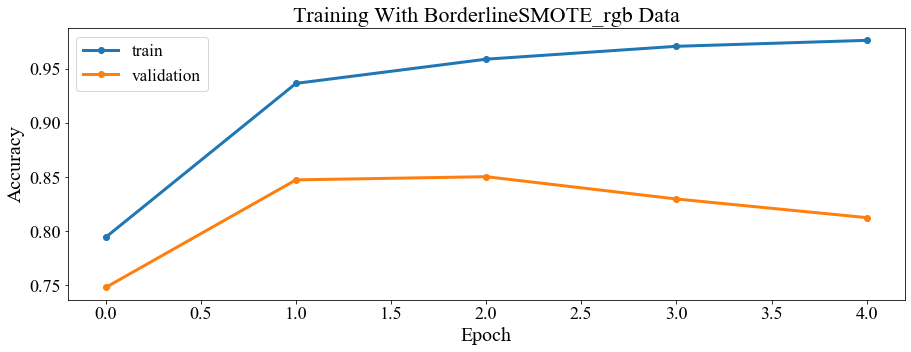

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 5.0) # Setting default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['font.family'] = 'Times New Roman'

fig = plt.figure()
plt.plot(h.history['accuracy'], '-o', linewidth=3.0)
plt.plot(h.history['val_accuracy'], '-o', linewidth=3.0)
plt.title('Training With BorderlineSMOTE_rgb Data', fontsize=22)
plt.legend(['train', 'validation'], loc='upper left', fontsize='xx-large')
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.tick_params(labelsize=18)

# Showing the plot
plt.show()

# Saving the plot
fig.savefig('Training With BorderlineSMOTE_rgb Data.png')
plt.close()

In [13]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np

#Confution Matrix and Classification Report
Y_pred = model.predict(data['x_test'])
y_pred = np.argmax(Y_pred, axis=1)
y_val = np.argmax(data['y_test'],axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_val, y_pred))
print('Classification Report')
print(classification_report(y_val, y_pred))

Confusion Matrix
[[ 28  13   2 ...   0   0   0]
 [  4 593  56 ...   0   0   0]
 [  1  21 680 ...   1   0   4]
 ...
 [  0   0   0 ...  90   0   0]
 [  0   0   0 ...   0  35   8]
 [  0   0   0 ...   0   1  85]]
Classification Report
              precision    recall  f1-score   support

           0       0.70      0.47      0.56        60
           1       0.87      0.82      0.85       720
           2       0.79      0.91      0.85       750
           3       0.53      0.90      0.67       450
           4       0.85      0.83      0.84       660
           5       0.92      0.66      0.77       630
           6       0.91      0.67      0.77       150
           7       0.78      0.82      0.80       450
           8       0.88      0.80      0.84       450
           9       0.94      0.92      0.93       480
          10       0.94      0.96      0.95       660
          11       0.70      0.97      0.81       420
          12       0.99      0.92      0.96       690
          13

In [20]:
test_accuracy = np.mean(y_pred == y_val)
print("test_accuracy: ", test_accuracy)

test_accuracy:  0.8422802850356295
